### 导入数据

#### 提取节点的Attribute

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',10) # 调整pandas行的显示限制 
node_features = pd.read_csv('D:/DPIs/data/Drug_Protein_Attribute.csv',header = None) 
node_features  

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
1,1,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
2,2,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
3,3,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
4,4,1.180584,0.526513,0.793145,-0.245426,-0.220634,0.559357,1.059898,0.148331,-0.981740,...,0.003815,-0.553314,0.003378,0.335591,0.143528,-1.134055,0.629610,0.330191,0.377519,-0.798777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,1614,0.115819,0.086158,0.011299,0.008475,0.086158,0.074859,0.011299,0.007062,0.012712,...,0.001412,0.002825,0.002825,0.000000,0.001412,0.002825,0.002825,0.001412,0.002825,0.000000
1615,1615,0.153169,0.107394,0.017606,0.007042,0.096831,0.056338,0.012324,0.012324,0.019366,...,0.000000,0.000000,0.003521,0.000000,0.000000,0.001761,0.005282,0.000000,0.000000,0.000000
1616,1616,0.120000,0.111667,0.020000,0.008333,0.106667,0.060000,0.018333,0.008333,0.018333,...,0.001667,0.000000,0.001667,0.001667,0.000000,0.000000,0.005000,0.001667,0.000000,0.003333
1617,1617,0.131970,0.105948,0.009294,0.020446,0.098513,0.053903,0.020446,0.007435,0.014870,...,0.005576,0.001859,0.007435,0.000000,0.003717,0.000000,0.001859,0.001859,0.001859,0.000000


In [2]:
# 将词向量提取为特征,第二列到倒数第一列
node_features = node_features.iloc[:,1:]
 # 检查特征：共64个特征，837个样本点
print(node_features.shape)

(1619, 64)


#### 划分训练集测试集

In [3]:
DTIs= pd.read_csv('D:/DPIs/data/Drug_Protein_Num.csv',header = None) 
DTIs 

,0,1
0,0,984
1,0,985
2,0,986
3,1,987
4,1,988
...,...,...
11391,877,1322
11392,877,1324
11393,969,1324
11394,969,1129


#### 生成随机种子

In [4]:
import math
import random
def partition(ls, size):
    """
    Returns a new list with elements
    of which is a list of certain size.

        >>> partition([1, 2, 3, 4], 3)
        [[1, 2, 3], [4]]
    """
    return [ls[i:i+size] for i in range(0, len(ls), size)]
# 由AllEdge产生RandomList
RandomList = random.sample(range(0, len(DTIs)), len(DTIs))
print('len(RandomList)', len(RandomList))
NewRandomList = partition(RandomList, math.ceil(len(RandomList) / 5))
print('len(NewRandomList[0])', len(NewRandomList[0]))
#NaN = pd.isnull(NewRandomList).any(0).nonzero()[0]
NewRandomList = pd.DataFrame(NewRandomList)
NewRandomList = NewRandomList.fillna(int(0))
NewRandomList = NewRandomList.astype(int)
NewRandomList.to_csv('D:/DPIs/data/NewRandomList.csv', header=None,index=False)
#del NewRandomList, RandomList
NewRandomList

len(RandomList) 11396
len(NewRandomList[0]) 2280


,0,1,2,3,4,5,6,7,8,9,...,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279
0,4100,3779,4155,3068,4545,5329,4138,11054,1291,3755,...,3676,923,5359,1183,4513,10755,4169,6863,2719,3338
1,10336,5164,8636,9538,6930,10501,5335,10214,9334,1925,...,6713,7462,358,1903,83,1155,6680,10853,4884,92
2,548,5161,9249,7552,6324,10639,9288,3012,8428,7565,...,10090,3183,5355,3670,5466,3814,10383,8930,5786,3082
3,5675,3459,2050,8753,5694,5141,9866,4079,8240,5859,...,4599,5149,9355,3366,1726,4183,11192,196,11045,3752
4,10127,8139,6837,2720,11228,9832,6210,2724,3008,8177,...,4680,2780,6577,3208,6439,7654,0,0,0,0


In [5]:
Nindex = pd.read_csv('D:/DPIs/data/NewRandomList.csv',header=None)
for i in range(len(Nindex)):
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    DTIs_train= pd.DataFrame(np.array(DTIs)[index])
    DTIs_train.to_csv('D:/DPIs/data/DTIs_train'+str(i)+'.csv', header=None,index=False)
    DTIs_train = DTIs_train.sample(frac=1.0)
    DTIs_train.to_csv('D:/DPIs/data/DTIs_train'+str(i)+'.txt', sep='\t' ,header=None,index=False)
    DTIs_test=pd.DataFrame(np.array(DTIs)[np.array(Nindex)[i]])
    DTIs_test.to_csv('D:/DPIs/data/DTIs_test'+str(i)+'.csv', header=None,index=False)
    print(i)
del Nindex, index, DTIs_train, DTIs_test

0
1
2
3
4


#### 设置节点类型标签

In [6]:
labels = pd.DataFrame(np.random.rand(max(DTIs[1])+1,1))#pd.DataFrame(np.random.rand(max(NLMI_num),1))
labels[0:max(DTIs[0])+1]=0
labels[max(DTIs[0])+1:]=1
labels = labels[0] # 提取节点标签列
labels.to_csv('D:/DPIs/data/labels.csv',header=0,index=0)
labels[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float64

### 生成负样本

In [7]:
def NegativeGenerate(LncDisease, AllRNA,AllDisease):
    # 负样本为全部的disease-rna（328*881）中随机抽取，未在内LncDisease即为负样本
    import random
    NegativeSample = []
    counterN = 0
    while counterN < len(LncDisease):  # 随机选出一个疾病rna对
        counterR = random.randint(0, len(AllRNA) - 1)
        counterD = random.randint(0, len(AllDisease) - 1)
        DiseaseAndRnaPair = []
        DiseaseAndRnaPair.append(AllRNA[counterR])
        DiseaseAndRnaPair.append(AllDisease[counterD])
        flag1 = 0
        counter = 0
        while counter < len(LncDisease):
            if DiseaseAndRnaPair == LncDisease[counter]:
                flag1 = 1
                break
            counter = counter + 1
        if flag1 == 1:
            continue
        flag2 = 0
        counter1 = 0
        while counter1 < len(NegativeSample):  # 在已选的负样本中没有，防止重复
            if DiseaseAndRnaPair == NegativeSample[counter1]:
                flag2 = 1
                break
            counter1 = counter1 + 1
        if flag2 == 1:
            continue
        if (flag1 == 0 & flag2 == 0):
            NamePair = []  # 生成对
            NamePair.append(AllRNA[counterR])
            NamePair.append(AllDisease[counterD])
            NegativeSample.append(NamePair)
            counterN = counterN + 1
    return NegativeSample
Dr = pd.read_csv('D:/DPIs/data/drug_name.csv',header=0,names=['id','name'])
Pr = pd.read_csv('D:/DPIs/data/protein_name.csv',header=0,names=['id','name'])
NegativeSample = NegativeGenerate(DTIs.values.tolist(),Dr['id'].values.tolist(),Pr['id'].values.tolist())
NegativeSample = pd.DataFrame(NegativeSample)
NegativeSample.to_csv('D:/DPIs/data/NegativeSample.csv', header=None,index=False)
NegativeSample.head()

,0,1
0,798,1082
1,893,1397
2,824,1552
3,510,1557
4,208,1603


### 建立邻接矩阵方阵

In [8]:
# 构建初始的邻接矩阵 #('./data/DDI_train'+str(i)+'.csv')
def load_file_as_Adj_matrix(filename):
    import scipy.sparse as sp
    DTIs_train = pd.read_csv(filename,header=None)
    if max(DTIs_train[1]) != 1618:
        relation_matrix = np.zeros((1618+1,1618+1))
    else:
        relation_matrix = np.zeros((max(DTIs_train[1]+1),max(DTIs_train[1]+1)))
    for i, j in np.array(DTIs_train):
        lnc, mi = int(i), int(j)
        relation_matrix[lnc, mi] = 1
    Adj = sp.csr_matrix(relation_matrix, dtype=np.float32)
    return Adj

In [9]:
# 构建GCN训练需要的邻接方阵
import scipy.sparse as sp
import torch
def load_data(adj,node_features,node_labels):
  features = sp.csr_matrix(node_features, dtype=np.float32)  # 储存为csr型稀疏矩阵
  # build symmetric adjacency matrix   论文里A^=(D~)^0.5 A~ (D~)^0.5这个公式
  # adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
  # 对于无向图，邻接矩阵是对称的。上一步得到的adj是按有向图构建的，转换成无向图的邻接矩阵需要扩充成对称矩阵
  features = normalize(features)
  adj = normalize(adj + sp.eye(adj.shape[0]))   # eye创建单位矩阵，第一个参数为行数，第二个为列数
  # 对应公式A~=A+IN
  # 分别构建训练集、验证集、测试集，并创建特征矩阵、标签向量和邻接矩阵的tensor，用来做模型的输入
  idx_train = range(500)
  idx_val = range(500, 660)
  idx_test = range(660, int(adj.shape[0]))  
  features = torch.FloatTensor(np.array(features.todense()))  # tensor为pytorch常用的数据结构
  labels = torch.LongTensor(np.array(node_labels))
  adj = sparse_mx_to_torch_sparse_tensor(adj)   # 邻接矩阵转为tensor处理
  idx_train = torch.LongTensor(idx_train)
  idx_val = torch.LongTensor(idx_val)
  idx_test = torch.LongTensor(idx_test)
  return adj, features, labels, idx_train, idx_val, idx_test  
def normalize(mx):
  """Row-normalize sparse matrix"""
  rowsum = np.array(mx.sum(1))  # 对每一行求和
  r_inv = np.power(rowsum, -1).flatten()  # 求倒数
  r_inv[np.isinf(r_inv)] = 0.  # 如果某一行全为0，则r_inv算出来会等于无穷大，将这些行的r_inv置为0
  r_mat_inv = sp.diags(r_inv)  # 构建对角元素为r_inv的对角矩阵
  mx = r_mat_inv.dot(mx)
  # 用对角矩阵与原始矩阵的点积起到标准化的作用，原始矩阵中每一行元素都会与对应的r_inv相乘，最终相当于除以了sum
  return mx

def accuracy(output, labels):
  preds = output.max(1)[1].type_as(labels) # 使用type_as(tesnor)将张量转换为给定类型的张量。
  correct = preds.eq(labels).double()  # 记录等于preds的label eq:equal
  correct = correct.sum()
  return correct / len(labels)

def sparse_mx_to_torch_sparse_tensor(sparse_mx):    # 把一个sparse matrix转为torch稀疏张量
  """
  numpy中的ndarray转化成pytorch中的tensor : torch.from_numpy()
  pytorch中的tensor转化成numpy中的ndarray : numpy()
  """
  sparse_mx = sparse_mx.tocoo().astype(np.float32)
  indices = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
  # 不懂的可以去看看COO性稀疏矩阵的结构
  values = torch.from_numpy(sparse_mx.data)
  shape = torch.Size(sparse_mx.shape)
  return torch.sparse.FloatTensor(indices, values, shape)

### 构建GCN

In [10]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module

class GraphConvolution(Module):

    # 初始化层：输入feature，输出feature，权重，偏移
    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))  # FloatTensor建立tensor
        # 常见用法self.v = torch.nn.Parameter(torch.FloatTensor(hidden_size))：
        # 首先可以把这个函数理解为类型转换函数，将一个不可训练的类型Tensor转换成可以训练的类型parameter并将这个parameter
        # 绑定到这个module里面，所以经过类型转换这个self.v变成了模型的一部分，成为了模型中根据训练可以改动的参数了。
        # 使用这个函数的目的也是想让某些变量在学习的过程中不断的修改其值以达到最优化。
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
            # Parameters与register_parameter都会向parameters写入参数，但是后者可以支持字符串命名
        self.reset_parameters()

    # 初始化权重
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        # size()函数主要是用来统计矩阵元素个数，或矩阵某一维上的元素个数的函数  size（1）为行
        self.weight.data.uniform_(-stdv, stdv)  # uniform() 方法将随机生成下一个实数，它在 [x, y] 范围内
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    '''
    前馈运算 即计算A~ X W(0)
    input X与权重W相乘，然后adj矩阵与他们的积稀疏乘
    直接输入与权重之间进行torch.mm操作，得到support，即XW
    support与adj进行torch.spmm操作，得到output，即AXW选择是否加bias
    '''
    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        # torch.mm(a, b)是矩阵a和b矩阵相乘，torch.mul(a, b)是矩阵a和b对应位相乘，a和b的维度必须相等
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias 
        else:
            return output
#通过设置断点，可以看出output的形式是0.01，0.01，0.01，0.01，0.01，#0.01，0.94]，里面的值代表该x对应标签不同的概率，故此值可转换为#[0,0,0,0,0,0,1]，对应我们之前把标签onthot后的第七种标签

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'



In [11]:
import torch.nn as nn
import torch.nn.functional as F
class GCN(nn.Module):
  def __init__(self, nfeat, nhid, nclass, dropout):
    # 底层节点的参数，feature的个数；隐层节点个数；最终的分类数
    super(GCN, self).__init__()  #  super()._init_()在利用父类里的对象构造函数
    self.gc1 = GraphConvolution(nfeat, nhid)   # gc1输入尺寸nfeat，输出尺寸nhid
    self.gc2 = GraphConvolution(nhid, nclass)  # gc2输入尺寸nhid，输出尺寸ncalss
    self.dropout = dropout
    self.weight = Parameter(torch.FloatTensor(nfeat, nhid))  # FloatTensor建立tensor
    # 输入分别是特征和邻接矩阵。最后输出为输出层做log_softmax变换的结果
  def forward(self, x, adj):
    x = F.relu(self.gc1(x, adj))   # adj即公式Z=softmax(A~Relu(A~XW(0))W(1))中的A~
    x2 = F.dropout(x, self.dropout, training = self.training)  # x要dropout
    x2 = self.gc2(x2, adj)
    return F.log_softmax(x2, dim = 1), x2   #, x  # 参数dim=1表示对每一行求softmax，那么每一行的值加起来都等于1。

In [12]:
import numpy
print(numpy.__version__)

1.20.3


### 使用GCN训练属性

In [13]:
# Training settings
learning_rate = 0.001
weight_decay = 5e-4
epoch_num = 200
dropout = 0.02
#in_size = node_features  #设置输入层的维数
hi_size = 64 # 16 #设置隐藏层的维数

name = locals() # 利用locals()创建变量
for i in range(5):
    Adj = load_file_as_Adj_matrix('D:/DPIs/data/DTIs_train'+str(i)+'.csv')
    adj, train_features, trian_labels, idx_train, idx_val, idx_test = load_data(Adj,node_features,labels)
    model = GCN(nfeat=train_features.shape[1],
            nhid=hi_size,
            nclass= 16,#labels.max().item() + 1,
            dropout=dropout)
    model.train()
    global Emdebding_train, output
    output, Emdebding_train = model(train_features, adj)
    Emdebding_GCN = pd.DataFrame(Emdebding_train.detach().numpy())
    GCN_A = pd.concat([Emdebding_GCN, node_features], axis=1)
    GCN_A.to_csv('D:/DPIs/data/Emdebding_GCN_1'+str(i)+'.csv', header=None,index=False)
    del Adj, adj, train_features, trian_labels, idx_train, idx_val, idx_test, output
    print(i)
GCN_A.head()

0
1
2
3
4


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.133122,0.034688,-0.226354,-0.273388,-0.096957,0.083368,0.188708,-0.029364,0.275690,0.130663,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
1,0.137513,0.018594,-0.220304,-0.278239,-0.112687,0.080220,0.185477,-0.030413,0.278243,0.118282,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
2,0.130371,0.022272,-0.228224,-0.282340,-0.108233,0.084594,0.186426,-0.033689,0.282782,0.124895,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
3,0.126815,0.014483,-0.224635,-0.286620,-0.109056,0.080627,0.191658,-0.033381,0.279397,0.123494,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
4,0.129149,0.017889,-0.226111,-0.283558,-0.095113,0.087819,0.186892,-0.029692,0.285642,0.113495,...,0.003815,-0.553314,0.003378,0.335591,0.143528,-1.134055,0.62961,0.330191,0.377519,-0.798777


In [14]:
dd = pd.DataFrame(np.random.randint(0,1,node_features.shape[0]))
dd['index']=dd.index
dd

,0,index
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1614,0,1614
1615,0,1615
1616,0,1616
1617,0,1617


### 生成最终训练的数据

In [15]:
import scipy.sparse as sp
import pandas as pd
import numpy as np
creat_var = locals() # 利用locals()创建变量
creat_var = locals() # 利用locals()创建变量
Negative = pd.read_csv('D:/DPIs/data/NegativeSample.csv',header=None)
Nindex = pd.read_csv('D:/DPIs/data/NewRandomList.csv',header=None)
Negative[2] = Negative.apply(lambda x: 0 if x[0] < 0 else 0, axis=1)
for i in range(5):
    data_train_feature, data_test_feature = [], []
    Embedding_GCN = pd.read_csv('D:/DPIs/data/Emdebding_GCN_1'+str(i)+'.csv',header=None)
    Embedding_grarep = pd.read_csv('D:/DPIs/data/Embedding_grarep'+str(i)+'.txt', sep=' ',header=None, error_bad_lines=False)
    Embedding_grarep = Embedding_grarep.sort_values(0,ascending=True)# 建立序号排序
    Embedding_grarep.set_index(0, inplace=True)
    Embedding_grarep['index'] = Embedding_grarep.index
    Embedding = pd.merge(dd,Embedding_grarep,how='left',on='index')
    Embedding = Embedding.fillna(int(0)).iloc[:,2:]
    train_data = pd.read_csv('D:/DPIs/data/DTIs_train'+str(i)+'.csv',header=None)
    train_data[2] = train_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    result = train_data.append(pd.DataFrame(np.array(Negative)[index]))    
    labels_train = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding_Node2vec)[result.iloc[r,0]]])
    for r in range(len(result)):# np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding_Node2vec)[result.iloc[r,1]]])
        data_train_feature.append(np.hstack([np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding)[result.iloc[r,0]]]),
                                             np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding)[result.iloc[r,1]]])]))
    creat_var['data_train'+str(i)] = data_train_feature
    creat_var['labels_train'+str(i)] = labels_train
    print(len(labels_train))
    del labels_train, result, data_train_feature, r
    test_data = pd.read_csv('D:/DPIs/data/DTIs_test'+str(i)+'.csv',header=None)
    test_data[2] = test_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    result = test_data.append(pd.DataFrame(np.array(Negative)[np.array(Nindex)[i]]))    
    labels_test = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding_Node2vec)[result.iloc[x,0]]])
    for x in range(len(result)):#np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding_Node2vec)[result.iloc[x,1]]])
        data_test_feature.append(np.hstack([np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding)[result.iloc[x,0]]]),
                                            np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding)[result.iloc[x,1]]])]))
    creat_var['data_test'+str(i)] = data_test_feature
    creat_var['labels_test'+str(i)] = labels_test
    print(len(labels_test))
    del train_data, test_data, labels_test, result, data_test_feature, x#, Embedding_Node2vec, Embedding, Embedding_GCN    
    print(i)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


18240
4560
0
18240
4560
1
18240
4560
2
18240
4560
3
18240
4560
4


In [17]:
data_train = [data_train0,data_train1,data_train2,data_train3,data_train4]
data_test = [data_test0,data_test1,data_test2,data_test3,data_test4]
labels_train = [labels_train0,labels_train1,labels_train2,labels_train3,labels_train4]
labels_test = [labels_test0,labels_test1,labels_test2,labels_test3,labels_test4]
print(np.array(data_train0).shape)
print(np.array(data_test0).shape)
print(np.array(labels_train0).shape)
print(np.array(labels_test0).shape)

(18240, 416)
(4560, 416)
(18240,)
(4560,)


### 开始训练

#### 评价指标

In [18]:
# 评价指标
import math
def MyConfusionMatrix(y_real,y_predict): 
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(y_real, y_predict)
    print(CM)
    CM = CM.tolist()
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1] 
    print('TN:%d, FP:%d, FN:%d, TP:%d' % (TN, FP, FN, TP))
    Acc = (TN + TP) / (TN + TP + FN + FP)
    Sen = TP / (TP + FN)
    Spec = TN / (TN + FP)
    Prec = TP / (TP + FP)
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # 分母可能出现0，需要讨论待续
    print('Acc:', round(Acc, 4))
    print('Sen:', round(Sen, 4))
    print('Spec:', round(Spec, 4))
    print('Prec:', round(Prec, 4))
    print('MCC:', round(MCC, 4))
    Result = []
    Result.append(round(Acc, 4))
    Result.append(round(Sen, 4))
    Result.append(round(Spec, 4))
    Result.append(round(Prec, 4))
    Result.append(round(MCC, 4))
    return Result

def MyAverage(matrix):
    SumAcc = 0
    SumSen = 0
    SumSpec = 0
    SumPrec = 0
    SumMcc = 0
    counter = 0
    while counter < len(matrix):
        SumAcc = SumAcc + matrix[counter][0]
        SumSen = SumSen + matrix[counter][1]
        SumSpec = SumSpec + matrix[counter][2]
        SumPrec = SumPrec + matrix[counter][3]
        SumMcc = SumMcc + matrix[counter][4]
        counter = counter + 1
    print('AverageAcc:',SumAcc / len(matrix))
    print('AverageSen:', SumSen / len(matrix))
    print('AverageSpec:', SumSpec / len(matrix))
    print('AveragePrec:', SumPrec / len(matrix))
    print('AverageMcc:', SumMcc / len(matrix))
    return

def MyStd(result):
    import numpy as np
    NewMatrix = []
    counter = 0
    while counter < len(result[0]):
        row = []
        NewMatrix.append(row)
        counter = counter + 1
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            NewMatrix[counter1].append(result[counter][counter1])
            counter1 = counter1 + 1
        counter = counter + 1
    StdList = []
    MeanList = []
    counter = 0
    while counter < len(NewMatrix):
        # std
        arr_std = np.std(NewMatrix[counter], ddof=1)
        StdList.append(arr_std)
        # mean
        arr_mean = np.mean(NewMatrix[counter])
        MeanList.append(arr_mean)
        counter = counter + 1
    result.append(MeanList)
    result.append(StdList)
    # 换算成百分比制
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            result[counter][counter1] = round(result[counter][counter1] * 100, 2)
            counter1 = counter1 + 1
        counter = counter + 1
    return result

import csv
def StorFile(data, fileName):
    with open(fileName, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)
    return

#### 使用Machine Learning

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2132  148]
 [ 293 1987]]
---------------------------------------------

fold =  0
---------------------------------------------

[[2132  148]
 [ 293 1987]]
TN:2132, FP:148, FN:293, TP:1987
Acc: 0.9033
Sen: 0.8715
Spec: 0.9351
Prec: 0.9307
MCC: 0.8082
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/200891001.py:76: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2131  149]
 [ 293 1987]]
---------------------------------------------

fold =  1
---------------------------------------------

[[2131  149]
 [ 293 1987]]
TN:2131, FP:149, FN:293, TP:1987
Acc: 0.9031
Sen: 0.8715
Spec: 0.9346
Prec: 0.9302
MCC: 0.8078
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/200891001.py:76: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:59:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2142  138]
 [ 328 1952]]
---------------------------------------------

fold =  2
---------------------------------------------

[[2142  138]
 [ 328 1952]]
TN:2142, FP:138, FN:328, TP:1952
Acc: 0.8978
Sen: 0.8561
Spec: 0.9395
Prec: 0.934
MCC: 0.7984
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/200891001.py:76: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:59:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2133  147]
 [ 334 1946]]
---------------------------------------------

fold =  3
---------------------------------------------

[[2133  147]
 [ 334 1946]]
TN:2133, FP:147, FN:334, TP:1946
Acc: 0.8945
Sen: 0.8535
Spec: 0.9355
Prec: 0.9298
MCC: 0.7917
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/200891001.py:76: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2160  120]
 [ 339 1941]]
---------------------------------------------

fold =  4
---------------------------------------------

[[2160  120]
 [ 339 1941]]
TN:2160, FP:120, FN:339, TP:1941
Acc: 0.8993
Sen: 0.8513
Spec: 0.9474
Prec: 0.9418
MCC: 0.8024
AverageAcc: 0.8996000000000001
AverageSen: 0.8607799999999999
AverageSpec: 0.93842
AveragePrec: 0.9333
AverageMcc: 0.8017


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/200891001.py:76: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


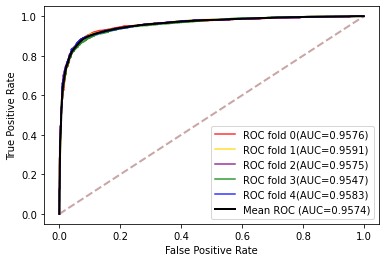

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = [301, 401, 501, 601, 701, 801, 901, 999]
# cv_scores = [] #用来放每个模型的结果值
# for n in k_range:
#     print('n_estimators: %d '%(n))
#     RandomF = RandomForestClassifier(n_estimators=n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(RandomF,data_train0, labels_train0,
#                              cv=5,
#                              scoring='roc_auc', 
#                              n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is：", k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_XGB = XGBClassifier(learning_rate=0.15,max_depth=500,n_estimators=500)
#                                  n_estimators=100,  ##树的个数
#                                  max_depth=4,        ##树额深度
#                                  min_child_weight=1,  ##叶子节点最小权重
#                                  gamma=0,             ##惩罚项中叶子节点个数前的参数
#                                  subsample=1,         ##所有样本建立决策树
#                                  colsample_btree=1,   ##所有特征建立决策树
#                                  scale_pos_weight=1,  ##解决样本个数不平衡的问题
#                                  random_state=27,     ##随机数
#                                  slient=0)
    print('开始训练')
    #训练模型
    best_XGB.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_XGB,'D:/DPIs/model/'+'XGB'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_XGB.predict(np.array(X_test))
    y_score_XGB = best_XGB.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_XGB[:,1]]).T
    XGB_data = pd.DataFrame(dd)
    XGB_data.to_csv('D:/DPIs/predict/' + 'XGB_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_XGB[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('D:/DPIs/evaluate/XGB_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('D:/DPIs/image/'+ now + 'XGB.svg')
plt.show()      

#### 画5折的PR图

average_precision 0.9626948833737659
average_precision 0.9625844127531168
average_precision 0.9629575104186807
average_precision 0.9586929464596681
average_precision 0.9625550412181519


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/2301458966.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/2301458966.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/2301458966.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/2301458966.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/2301458966.py:30: DeprecationWarning: scipy.interp is depr

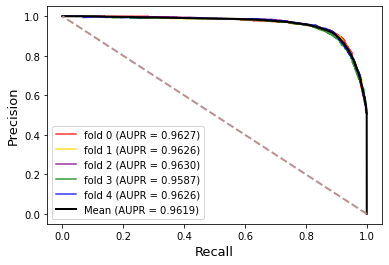

In [22]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from scipy import interp
import numpy as np

mean_fpr = np.linspace(0, 1, 1000)
i = 0
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']

Ps = []
#Rs = []
RPs = []
mean_R = np.linspace(0, 1, 1000)
#Reals = []
#PredictionProbs = []

for i in range(5):
    # 读取文件
    RAPNameProb = 'D:/DPIs/predict/' + 'XGB_'+ str(i)+ 'Prob.csv'
    RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)
    
    Real = RealAndPredictionProb[0]
    # Prediction = RealAndPrediction[1]
    PredictionProb = RealAndPredictionProb[1]

    average_precision = average_precision_score(Real, PredictionProb)
    precision, recall, _ = precision_recall_curve(Real, PredictionProb)

    Ps.append(interp(mean_R, precision, recall))
    RPs.append(average_precision)

    #Reals.append(Real)
    #PredictionProbs.append(PredictionProb)
    # 弧线
    plt.plot(recall, precision, lw=1.5, alpha=0.8, color=colorlist[i],
             label='fold %d (AUPR = %0.4f)' % (i, average_precision))
    print('average_precision', average_precision)

#  画均值
mean_P = np.mean(Ps, axis=0)
mean_RPs = np.mean(RPs, axis=0)
#std_RPs = np.std(RPs)
plt.plot(mean_P, mean_R, color='black',
         label=r'Mean (AUPR = %0.4f)' % (mean_RPs),
         lw=2, alpha=1)
plt.xlabel('Recall',fontsize=13)
plt.ylabel('Precision',fontsize=13)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
# 画对角线
plt.plot([1, 0], [0, 1], color='rosybrown', lw=2, linestyle='--')
plt.legend(loc='best')
plt.savefig('D:/DPIs/image/XGB_PR-5fold.svg')
plt.show()

### 比较不同的分类器

DecisionTree的实现

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[[1937  343]
 [ 434 1846]]
---------------------------------------------

fold =  0
---------------------------------------------

[[1937  343]
 [ 434 1846]]
TN:1937, FP:343, FN:434, TP:1846
Acc: 0.8296
Sen: 0.8096
Spec: 0.8496
Prec: 0.8433
MCC: 0.6597
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/163662264.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[1879  401]
 [ 386 1894]]
---------------------------------------------

fold =  1
---------------------------------------------

[[1879  401]
 [ 386 1894]]
TN:1879, FP:401, FN:386, TP:1894
Acc: 0.8274
Sen: 0.8307
Spec: 0.8241
Prec: 0.8253
MCC: 0.6548
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/163662264.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[1935  345]
 [ 425 1855]]
---------------------------------------------

fold =  2
---------------------------------------------

[[1935  345]
 [ 425 1855]]
TN:1935, FP:345, FN:425, TP:1855
Acc: 0.8311
Sen: 0.8136
Spec: 0.8487
Prec: 0.8432
MCC: 0.6627
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/163662264.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[1923  357]
 [ 454 1826]]
---------------------------------------------

fold =  3
---------------------------------------------

[[1923  357]
 [ 454 1826]]
TN:1923, FP:357, FN:454, TP:1826
Acc: 0.8221
Sen: 0.8009
Spec: 0.8434
Prec: 0.8365
MCC: 0.6449
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/163662264.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[1940  340]
 [ 442 1838]]
---------------------------------------------

fold =  4
---------------------------------------------

[[1940  340]
 [ 442 1838]]
TN:1940, FP:340, FN:442, TP:1838
Acc: 0.8285
Sen: 0.8061
Spec: 0.8509
Prec: 0.8439
MCC: 0.6577
AverageAcc: 0.82774
AverageSen: 0.81218
AverageSpec: 0.8433400000000001
AveragePrec: 0.83844
AverageMcc: 0.65596


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/163662264.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


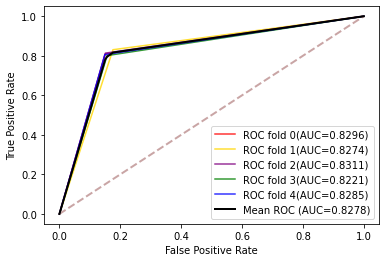

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = [301, 401, 501, 601, 701, 801, 901, 999]
# cv_scores = [] #用来放每个模型的结果值
# for n in k_range:
#     print('n_estimators: %d '%(n))
#     RandomF = RandomForestClassifier(n_estimators=n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(RandomF,data_train0, labels_train0,
#                              cv=5,
#                              scoring='roc_auc', 
#                              n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is：", k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
#     best_adb = HistGradientBoostingClassifier()
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_cart = DecisionTreeClassifier()
    print('开始训练')
    #训练模型
    best_cart.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_cart,'D:/DPIs/model/'+'CART'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_cart.predict(np.array(X_test))
    y_score_cart = best_cart.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_cart[:,1]]).T
    cart_data = pd.DataFrame(dd)
    cart_data.to_csv('D:/DPIs/predict/' + 'CART_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_cart[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('D:/DPIs/evaluate/CART_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('D:/DPIs/image/'+ now + 'CART_ROC.svg')
plt.show()      

#### GaussianNB的实现

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[[1440  840]
 [ 505 1775]]
---------------------------------------------

fold =  0
---------------------------------------------

[[1440  840]
 [ 505 1775]]
TN:1440, FP:840, FN:505, TP:1775
Acc: 0.705
Sen: 0.7785
Spec: 0.6316
Prec: 0.6788
MCC: 0.4146
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/739556405.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[1575  705]
 [ 552 1728]]
---------------------------------------------

fold =  1
---------------------------------------------

[[1575  705]
 [ 552 1728]]
TN:1575, FP:705, FN:552, TP:1728
Acc: 0.7243
Sen: 0.7579
Spec: 0.6908
Prec: 0.7102
MCC: 0.4497
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/739556405.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[1416  864]
 [ 453 1827]]
---------------------------------------------

fold =  2
---------------------------------------------

[[1416  864]
 [ 453 1827]]
TN:1416, FP:864, FN:453, TP:1827
Acc: 0.7112
Sen: 0.8013
Spec: 0.6211
Prec: 0.6789
MCC: 0.4294
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/739556405.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[1487  793]
 [ 553 1727]]
---------------------------------------------

fold =  3
---------------------------------------------

[[1487  793]
 [ 553 1727]]
TN:1487, FP:793, FN:553, TP:1727
Acc: 0.7048
Sen: 0.7575
Spec: 0.6522
Prec: 0.6853
MCC: 0.4119
正在划分训练集和测试集...
划分完毕！
开始训练


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/739556405.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


[[ 683 1597]
 [ 230 2050]]
---------------------------------------------

fold =  4
---------------------------------------------

[[ 683 1597]
 [ 230 2050]]
TN:683, FP:1597, FN:230, TP:2050
Acc: 0.5993
Sen: 0.8991
Spec: 0.2996
Prec: 0.5621
MCC: 0.2483
AverageAcc: 0.6889200000000001
AverageSen: 0.79886
AverageSpec: 0.5790599999999999
AveragePrec: 0.66306
AverageMcc: 0.39078


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/739556405.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr,tpr))


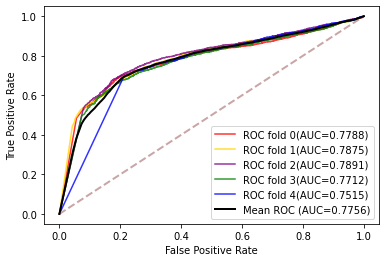

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = range(500,1000,20)
# cv_scores = []#用来放每个模型的结果值
# for n in k_range:
#     GBDT = GradientBoostingClassifier(n_estimators=n, subsample=0.8)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(GBDT,np.hstack([np.array(X_train1), np.array(X_train2)]), np.array(y_train1),cv=5,scoring='accuracy',n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is："k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_nb = GaussianNB()# 选择最优的K=3传入模型
    print('开始训练')
    #训练模型
    best_nb.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_nb,'D:/DPIs/model/'+'GNB'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_nb.predict(np.array(X_test))
    y_score_nb = best_nb.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0))
    
    dd = np.vstack([Y_test, y_score_nb[:,1]]).T
    nb_data = pd.DataFrame(dd)
    nb_data.to_csv('D:/DPIs/predict/' + 'GNB_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_nb[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('D:/DPIs/evaluate/GNB_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('D:/DPIs/image/'+ now + 'GNB_ROC.svg')
plt.show()

#### 比较不同分类器画图

C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/588565226.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/588565226.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/588565226.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/588565226.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/588565226.py:25: DeprecationWarning: scipy.interp is deprecated and will be remove

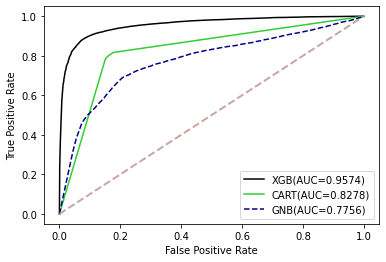

In [34]:
import pandas as pd
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

colorlist = ['red', 'gold', 'purple', 'limegreen', 'darkblue', 'k']

for i in range(1):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/XGB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
    
     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,color=colorlist[5],label=r'XGB(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/CART_' + str(j) + 'Prob.csv'  
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle='-',color=colorlist[3],label=r'CART(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/GNB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle='--',color=colorlist[4],label=r'GNB(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    
#     tprs = []
#     aucs = []
#     mean_fpr = np.linspace(0, 1, 1000)
#     for j in range(5):
#         # 读取文件
#         RAPNameProb = './predict/SVC_' + str(j) + 'Prob.csv'
#         RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

#         Real = RealAndPredictionProb[0]
#         PredictionProb = RealAndPredictionProb[1]

#         # 画图
#         fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
#         tprs.append(interp(mean_fpr, fpr, tpr))
#         tprs[-1][0] = 0.0

#      # 画均值
#     mean_tpr = np.mean(tprs, axis=0)
#     mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr) 
#     mean_tpr=np.mean(tprs,axis=0)
#     mean_tpr[-1]=1.0
#     mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
#     plt.plot(mean_fpr,mean_tpr,linestyle='-.',color=colorlist[0],label=r'SVM(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)  
      
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)    
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')   
plt.savefig('D:/DPIs/image/Compare_ROC.svg')
plt.savefig('D:/DPIs/image/Compare_ROC.tif')
plt.show()      


C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/3889713154.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/3889713154.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/3889713154.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/3889713154.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  Ps.append(interp(mean_R, precision, recall))
C:\Users\WRX80\AppData\Local\Temp/ipykernel_11096/3889713154.py:26: DeprecationWarning: scipy.interp is depr

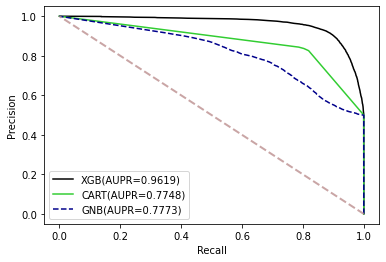

In [35]:
# 画PR曲线
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from scipy import interp
import numpy as np

colorlist = ['red', 'gold', 'purple', 'limegreen', 'darkblue', 'k']

for i in range(1): 
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/XGB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)
    
    # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,color=colorlist[5],label=r'XGB(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/CART_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle='-',color=colorlist[3],label=r'CART(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'D:/DPIs/predict/GNB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle='--',color=colorlist[4],label=r'GNB(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)

#     Ps = []
#     RPs = []
#     mean_R = np.linspace(0, 1, 1000)
#     for j in range(5):
#         # 读取文件
#         RAPNameProb = './predict/SVC_' + str(j) + 'Prob.csv'
#         RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

#         Real = RealAndPredictionProb[0]
#         PredictionProb = RealAndPredictionProb[1]

#         # 画图
#         average_precision = average_precision_score(Real, PredictionProb)
#         precision, recall, _ = precision_recall_curve(Real, PredictionProb)

#         Ps.append(interp(mean_R, precision, recall))
#         RPs.append(average_precision)

#      # 画均值
#     mean_P = np.mean(Ps, axis=0)
#     mean_RPs = np.mean(RPs, axis=0)
#     plt.plot(mean_P, mean_R,linestyle='-.',color=colorlist[0],label=r'SVM(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)  
      
plt.plot([1,0],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)    
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')   
plt.savefig('D:/DPIs/image/Compare_PR.svg')
plt.savefig('D:/DPIs/image/Compare_PR.tif')
plt.show()   

In [5]:
import pandas as pd
import numpy as np
df1=pd.DataFrame(np.arange(3).reshape(3,1))
df1

,0
0,0
1,1
2,2


In [6]:
df2=pd.DataFrame(np.arange(3).reshape(3,1))
df2

,0
0,0
1,1
2,2


In [9]:
dd = pd.concat([df1,df2],axis=1)
dd

,0,0
0,0,0
1,1,1
2,2,2
